## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [23]:
#réseau de neurone : sert à faire de la classification (classifier, prédire et prise de décision)


#DESCENTE DE GRADIENT : compare ce qu'on a a et ce qu'on obtenu pour minimiser fonction de perte et precision

#il vaut mieux prendre telle ou telle décision dans cette situation
#Zone blanche = zone d'incertitude totale
#quelle est la partie du plan qui sera pour les points bleus et blancs (avec la meilleure séparation possible)
#ça se base sur du calcul matriciel
# on utilise x1 : abcisse et x2 : ordonnée (on peut entrer d'autres choses comme sin(x1))
#il doit avoir une diagonale dans l'autre sens
#il doit s'entrainer pour déterminer les couleurs des deux plans
#si on rajoute en bas un point, il va considérer que c'est un point orange
#poids : par l'entrainement, il ajuste les poids (visible en placant le curseur sur les liens bleus) pour déterminer la coupure (zone d'indécision en blanc)
#couche de neurone : utile pour cherher des choses plus complexes que de simples séparations en ligne (séparation faite avec l'algèbre LINEAIRE) (test : ajouter des neurones)
#menu fonction activation Tanh : arrondit les angles
#rajouter suffisament de neurones pour avoir une bonne séparation
#quand on a nos 2 zones bien défini, on peut prédire quelque chose d'une nouvelle donnée. On le place sur le plan et on sait dans quelle partie du plan ce nouveau point fait parti
#on ne sait pas combien on doit mettre de couche et de nombre de neurones donc on fait plusieurs tests
#trop de neurones : ajoute des neurones parasites, des calculs inutiles

In [41]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow = librairie pour réseau de neuronne
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd #Traitement de données
# Ohter import
import sys #Tout ce qui touche au système
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

## Création des données d'entrainement

In [25]:
datas = [] #Coordonnées de chaque points
labels = [] #Couleur/Groupe de associé à chaque point
#But = Faire correspondre les datas avec les labels en donnant les deux listes et tels que data[1] correspond à labels[1]
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)#Abscisse
ord1 = np.random.normal(-2,.75,nbr_points)#Ordonnée
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2]) #On fait une liste de deux listes
abss = np.array(abss).ravel() #On supprime l'aspect 2 listes pour n'avoir qu'une liste de valeurs

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


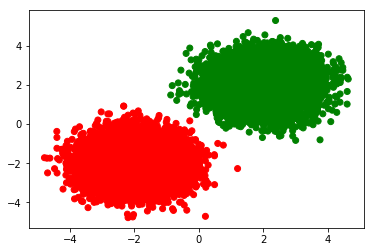

In [26]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)] #On convertit le label en int car array donne chaine de caractère
plt.scatter(abss,ords,color=colors)
plt.show()

In [27]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
print(len(datas))
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)]) #Crée une matrice de ligne abscisse et ordonee et de 2*nb colonnes
#zip fait parcourir les deux listes en même temps

20000


In [28]:
list(datas[0])+[labels[0]]

[-2.604490995520375, -1.813692410430729, 0.0]

In [29]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0          -2.604490995520375   -1.813692410430729     red
1         -1.1407333088738432  -1.5698506745245275     red
2         -2.2285146683865285  -1.8402878102279687     red
3          -2.728858494676314   -2.585481161163311     red
4         -0.8638186214830914   -2.979918410054328     red
5         -0.4666506810953357  -1.9782703075727286     red
6          -2.005533911831128   -2.576219164730605     red
7         -2.1896129058105567  -0.5820580103747686     red
8         -0.9350948608842808  -1.8003055721721632     red
9         -2.0558836657492954  -0.7806050496081804     red
10         -2.440324768651669  -1.3486205087723016     red
11        -1.5828234559931313  -1.3592536090245546     red
12        -2.5015625041283553  -1.4552705325153918     red
13        -2.0561406597761724  -1.6785523115655068     red
14        -1.7204995088166046  -1.1160401111648408     red
15        -1.6104270029511378  -2.0078791855441964     red
16         -2.109417463729517  -1.9441820914859858     red
17        -1.0982284142490766  -2.3409525088153145     red
18        -2.1995719331404135  -2.7824397296698593     red
19        -2.8001036183929653  -1.3584590567829264     red
20         -1.602954634956347  -1.4260394509481193     red
21        -3.9409073422027157  -1.9826763975812258     red
22        -1.5273550289725193   -2.959200297078765     red
23        -1.4977789851231487  -1.6747594002031385     red
24        -0.8020982192489772   -1.522852506975784     red
25         -2.203287614418519  -3.3195851479489336     red
26        -2.6805191675706657  -3.3104075157150827     red
27        -2.2997488259418173   -1.261404846374821     red
28         -1.779617717488132   -2.919294444240726     red
29         -2.858895402593225    -2.57468552258305     red
...                       ...                  ...     ...
19970       2.212601672794318   1.0636003049563096   green
19971      1.4454041316766484    2.917440738283137   green
19972  0.00048031159479133834   3.2723643029933287   green
19973      0.7193114215407301   3.0121569893554474   green
19974        2.69104472717718   3.9408352998492266   green
19975       1.956146873051795   1.8063548858613965   green
19976       1.189976850114189   2.5052336362417207   green
19977       1.858827841935328   2.6520212122813587   green
19978      3.6642278430265676   0.7146028558593791   green
19979      1.7824528379688427   1.9230087609480617   green
19980      3.1489199490313178   1.2560114755074951   green
19981       2.476171961734823   0.6173035962294922   green
19982      1.9887398252925388   2.5984826818495637   green
19983      3.1942890285306778   1.6869745739184296   green
19984       1.330245683819705    2.167538148028534   green
19985       1.638260539303959   3.8388452655476137   green
19986      1.7593148488554002   2.9901206105222915   green
19987      1.6476328096040347    3.025392552534899   green
19988      2.9341353196839774    2.797243896601355   green
19989      1.7950926465931805   1.4498588656592002   green
19990       2.595605311188947   2.4653430532760905   green
19991     0.34140094497940643    2.577443972840712   green
19992       2.101432641258548   2.4310836864931167   green
19993       2.587173383058168    3.381466639675144   green
19994      1.8846127439263864   1.1472377166002257   green
19995      0.6459724101602915   2.6472155244715667   green
19996       3.533138306123117   1.7574194887904997   green
19997      1.7300736132757442    1.355334876016213   green
19998       2.286387605000873   2.3014629346852202   green
19999       2.371399893482195   3.2182756106030435   green

[20000 rows x 3 columns]

## Création du modèle

In [30]:
# model creation
model = tf.keras.models.Sequential()
#Car il existe des modeles qui sont prédéfinis

### Ajout d'une couche de 2 neurones

In [31]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels
#IE relie tout avec tout Dense = relayer, layer = couche, keras = permet d'ajouter, de rendre un vecteur de probabilité
# 2 car on veut creer deux neuronnes
#Softmax va rendre un vecteur de probabilité 

## Exemple de prédiction sans entraînement

In [32]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])
#Fais moi une prediction sur la premiere donnée
#Il trouve 0 en sortie car 0,829 pour la premiere couleur et 0,17 pour la deuxieme couleur : en ajoutant les deux 
#ca fait 1 car se sont des probabilités d'arriver à une couleur. C'est donc normal que la somme des proba de cahque 
#couleur fasse 1
# Donne une probabilité pour la couleur associée à chaque valeur 
#Donne une réponse au pif car créee des coefficients complètement aléatoires et donc un modèle aléatoire
#Redonne toujours les mêmes valeurs sans prédiction car c'est une prédiction, il n'est pas encore entrainé (le réseau)

[[0.00604319 0.9939568 ]]
Found :  1
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [34]:
#COMPILATION DU MODELE = COMMENT LE MODELE VA S'ENTRAINER

#BUT = minimiser la fonction de perte

#Algorithme calcule la pente au point concerné
    #On définit un pas (learning rate) pour la descente max de la fonction du grdient
    #Plus le pas est petit on est sûrs de bien progresser mais peut être lent
    #Un grand pas fait mieux progresser mais peut entrîner un dépassement du minimum
    #Un petit pas peu converger sur un point minimum local mais on peut rater
    #facilement un minimum global sans s'en rendre compte
    # Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul (fonction qui correspond bien à la fonction de perte)
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [ ]:
labels
#datas

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [36]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)
#(donnees,cequ'on est censes obtenir (arrange toi pour avoir ca),nombre d'iterations,partie des donnees qui empeche le surentrainement)
#ATTENTION : SURENTRAINEMENT (peut dectecter chat+canape au lieu de chat sur bcp de photos avec chat sur canape)
#Fait diminuer la perte de données rapidement,  precision tres elevee et fonction perte quasi-nulle

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 2s 95us/sample - loss: 0.2317 - acc: 0.9312 - val_loss: 0.0292 - val_acc: 1.0000
Epoch 2/10
16000/16000 [==============================] - 1s 87us/sample - loss: 0.0167 - acc: 1.0000 - val_loss: 0.0164 - val_acc: 1.0000
Epoch 3/10
16000/16000 [==============================] - 1s 81us/sample - loss: 0.0107 - acc: 1.0000 - val_loss: 0.0118 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 1s 85us/sample - loss: 0.0081 - acc: 1.0000 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 1s 80us/sample - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0056 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 1s 82us/sample - loss: 0.0049 - acc: 1.0000 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

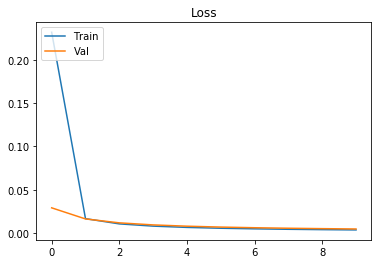

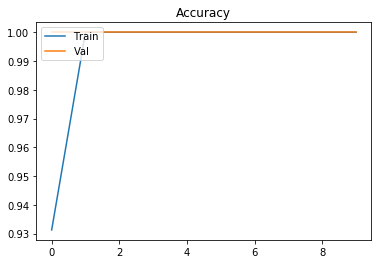

In [37]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [38]:
datas_tests = np.array([[2,2],[-2,-2]])
#Points choisis pour la prédiction, ici sont fixés et adaptés à l'exemple
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[7.3366688e-04 9.9926633e-01]
 [9.9954057e-01 4.5942698e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [39]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
#Points choisis pour la prédiction, ici sont fixés et adaptés à l'exemple
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.5582776  0.44172245]
 [0.57828325 0.42171672]
 [0.5980352  0.40196472]]


['darkred', 'darkred', 'darkred']

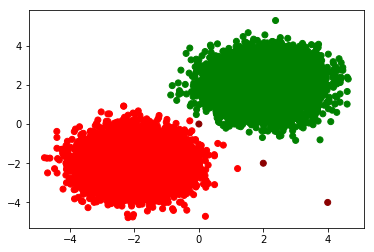

In [40]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

# Test des résultats obtenus

In [43]:
# example 
#EN GENERAL 10% a 20% DE DONNEES
#On peu prendre une partie du data set 
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 615us/sample - loss: 5.9675e-04 - acc: 1.0000
Test Loss 0.0005967530305497348
Test Accuracy 1.0


[[7.3366688e-04 9.9926633e-01]
 [9.9954057e-01 4.5942698e-04]]


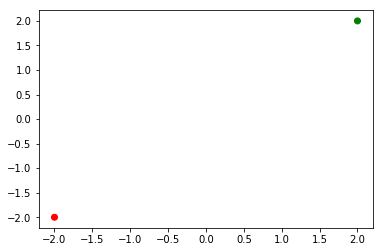

In [44]:
#TRACE DU TEST = REPRESENTATION GRAPHIQUE

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


## Exercice

Rafaire le jeu de données avec 2000 données

In [101]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow = librairie pour réseau de neuronne
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd #Traitement de données
# Ohter import
import sys #Tout ce qui touche au système
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [4]:
datas = [] #Coordonnées de chaque points
labels = [] #Couleur/Groupe de associé à chaque point
#But = Faire correspondre les datas avec les labels en donnant les deux listes et tels que data[1] correspond à labels[1]
nbr_points = 2000

abs1 = np.random.normal(-2,.75,nbr_points)#Abscisse
ord1 = np.random.normal(-2,.75,nbr_points)#Ordonnée
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

#ON REGROUPE NOS LISTES

abss = list([abs1,abs2]) #On fait une liste de deux listes
abss = np.array(abss).ravel() #On supprime l'aspect 2 listes pour n'avoir qu'une liste de valeurs

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


In [6]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)] #On convertit le label en int car array donne chaine de caractère
plt.scatter(abss,ords,color=colors)
plt.show()

datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)]) #Crée une matrice de ligne abscisse et ordonee et de 2*nb colonnes
#zip fait parcourir les deux listes en même temps

In [9]:
#Création du modèle

# model creation
model = tf.keras.models.Sequential()
#Car il existe des modeles qui sont prédéfinis

#Ajout de couches de neuronnes

# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels
#IE relie tout avec tout Dense = relayer, layer = couche, keras = permet d'ajouter, de rendre un vecteur de probabilité
# 2 car on veut creer deux neuronnes
#Softmax va rendre un vecteur de probabilité 

In [10]:
#COMPILATION DU MODELE = COMMENT LE MODELE VA S'ENTRAINER

#BUT = minimiser la fonction de perte

#Algorithme calcule la pente au point concerné
    #On définit un pas (learning rate) pour la descente max de la fonction du grdient
    #Plus le pas est petit on est sûrs de bien progresser mais peut être lent
    #Un grand pas fait mieux progresser mais peut entrîner un dépassement du minimum
    #Un petit pas peu converger sur un point minimum local mais on peut rater
    #facilement un minimum global sans s'en rendre compte
    # Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul (fonction qui correspond bien à la fonction de perte)
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [11]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)
#(donnees,cequ'on est censes obtenir (arrange toi pour avoir ca),nombre d'iterations,partie des donnees qui empeche le surentrainement)
#ATTENTION : SURENTRAINEMENT (peut dectecter chat+canape au lieu de chat sur bcp de photos avec chat sur canape)
#Fait diminuer la perte de données rapidement,  precision tres elevee et fonction perte quasi-nulle

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 0s 139us/sample - loss: 0.3826 - acc: 0.8394 - val_loss: 0.1113 - val_acc: 0.9987
Epoch 2/10
3200/3200 [==============================] - 0s 78us/sample - loss: 0.0692 - acc: 1.0000 - val_loss: 0.0591 - val_acc: 0.9987
Epoch 3/10
3200/3200 [==============================] - 0s 83us/sample - loss: 0.0418 - acc: 1.0000 - val_loss: 0.0418 - val_acc: 0.9987
Epoch 4/10
3200/3200 [==============================] - 0s 88us/sample - loss: 0.0306 - acc: 1.0000 - val_loss: 0.0330 - val_acc: 0.9987
Epoch 5/10
3200/3200 [==============================] - 0s 87us/sample - loss: 0.0244 - acc: 1.0000 - val_loss: 0.0276 - val_acc: 0.9987
Epoch 6/10
3200/3200 [==============================] - 0s 107us/sample - loss: 0.0205 - acc: 1.0000 - val_loss: 0.0240 - val_acc: 0.9987
Epoch 7/10
3200/3200 [==============================] - 0s 81us/sample - loss: 0.0177 - acc: 1.0000 - val_loss: 0.0213 - val_acc:

#### Résumé de l'entraînement

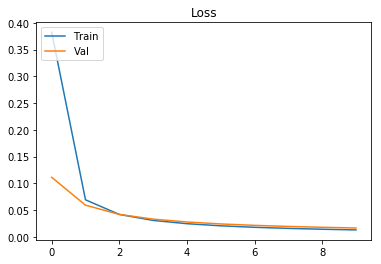

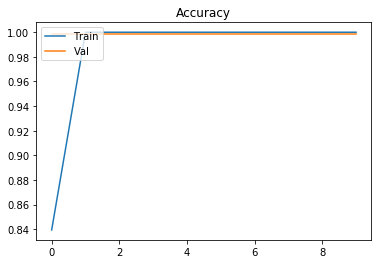

In [12]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [13]:
#TEST 

# example 
#EN GENERAL 10% a 20% DE DONNEES
#On peu prendre une partie du data set 

datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 902us/sample - loss: 0.0050 - acc: 1.0000
Test Loss 0.005004811566323042
Test Accuracy 1.0


## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [91]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)

datas = np.array(datas)

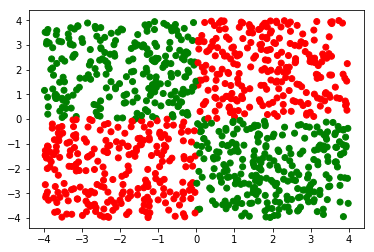

In [92]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [93]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [94]:
#On imbrique des couches de neuronnes intermediares

# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez testé, 4 neuronnes suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  
#Softmax = vecteur de probabilité
#Relu = si la valeur de sortie de mon neurone est > 0 il la conserve, si elle est negative il la met à 0
#RELU = A utiliser partout !!!!
#On peut aussi sortir des nombres entre 0 et 1 si on veut

#RELU = A utiliser partout !!!! Mais appliquer softmax après pour avoir des données de proba (car sinon il faut adapter le code pour l'affichage)

## Exemple de prédiction sans entraînement

In [95]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[ 1.80777519 -0.19564136]]
[[0.366104 0.633896]]
Found :  green
Should be :  green


## Résumé du modèle (couches de neurones)

In [96]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             multiple                  12        
_________________________________________________________________
dense_19 (Dense)             multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [97]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [98]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 363us/sample - loss: 0.9874 - acc: 0.5975 - val_loss: 0.8595 - val_acc: 0.6750
Epoch 2/10
800/800 [==============================] - 0s 86us/sample - loss: 0.8146 - acc: 0.6562 - val_loss: 0.7390 - val_acc: 0.6650
Epoch 3/10
800/800 [==============================] - 0s 140us/sample - loss: 0.7222 - acc: 0.6388 - val_loss: 0.6751 - val_acc: 0.6500
Epoch 4/10
800/800 [==============================] - 0s 108us/sample - loss: 0.6699 - acc: 0.6475 - val_loss: 0.6380 - val_acc: 0.6600
Epoch 5/10
800/800 [==============================] - 0s 123us/sample - loss: 0.6370 - acc: 0.6550 - val_loss: 0.6138 - val_acc: 0.6550
Epoch 6/10
800/800 [==============================] - 0s 199us/sample - loss: 0.6144 - acc: 0.6712 - val_loss: 0.5963 - val_acc: 0.6850
Epoch 7/10
800/800 [==============================] - 0s 130us/sample - loss: 0.5965 - acc: 0.6950 - val_loss: 0.5816 - val_acc: 0.6950
Epo

In [ ]:
#Résumé de l'entraînement 

loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## Le modèle est-il bien entraîné ?

In [99]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [100]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 104us/sample - loss: 0.5337 - acc: 0.7740
Test Loss 0.5336905527114868
Test Accuracy 0.774


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [121]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow = librairie pour réseau de neuronne
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd #Traitement de données
# Ohter import
import sys #Tout ce qui touche au système
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

In [141]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 10000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)
print(datas.shape)

(10000, 2)


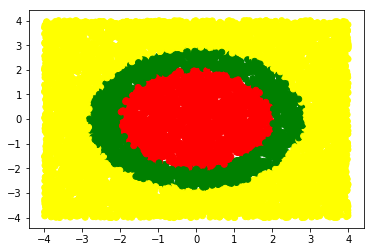

In [142]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

#### Création du modèle

In [143]:
# model creation
model = tf.keras.models.Sequential()

In [144]:
#Ajout des couches de neuronnes
model.add(tf.keras.layers.Dense(6, activation="relu"))  # Après test, on retient la valeur de 4 neuronnes
model.add(tf.keras.layers.Dense(3, activation="softmax")) # 3 neuronnes car 3 types de données
#On imbrique ces deux couches de neuronnes en terminant par l'activation "softmax" car plus facile à représenter

In [145]:
#Prédiction et résumé du modèle

print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

model.summary()

[[-3.12299039  0.62513003]]
[[0.35490036 0.2690536  0.376046  ]]
Found :  yellow
Should be :  yellow
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             multiple                  18        
_________________________________________________________________
dense_49 (Dense)             multiple                  21        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [146]:
#Compilation du modèle

model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

#### Entraînement du modèle

In [147]:
history = model.fit(datas, labels, epochs=30, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 181us/sample - loss: 0.8652 - acc: 0.5943 - val_loss: 0.8010 - val_acc: 0.6255
Epoch 2/30
8000/8000 [==============================] - 1s 140us/sample - loss: 0.7963 - acc: 0.6015 - val_loss: 0.7544 - val_acc: 0.6230
Epoch 3/30
8000/8000 [==============================] - 1s 136us/sample - loss: 0.7501 - acc: 0.6208 - val_loss: 0.7090 - val_acc: 0.6510
Epoch 4/30
8000/8000 [==============================] - 1s 157us/sample - loss: 0.7027 - acc: 0.6513 - val_loss: 0.6648 - val_acc: 0.6765
Epoch 5/30
8000/8000 [==============================] - 1s 144us/sample - loss: 0.6590 - acc: 0.6821 - val_loss: 0.6266 - val_acc: 0.7015
Epoch 6/30
8000/8000 [==============================] - 1s 137us/sample - loss: 0.6215 - acc: 0.7090 - val_loss: 0.5949 - val_acc: 0.7250
Epoch 7/30
8000/8000 [==============================] - 1s 132us/sample - loss: 0.5894 - acc: 0.7379 - val_loss: 0.5676 - va

#### Résumé de l'entraînement

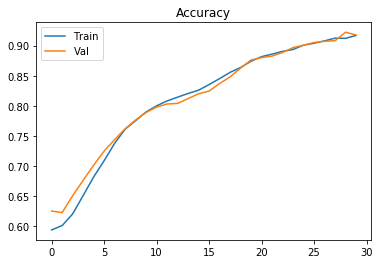

In [148]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

#### Le modèle est-il bien entraîné ?

In [149]:
#Génération d'un data_set de test

datas_test = []
labels_test = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels_test.append(0)
    elif norm_carre <= 8:
        labels_test.append(1)
    else:
        labels_test.append(2)
        
datas_test = np.array(datas_test)

In [150]:
#Test du réseau paramétré et entraîné

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 95us/sample - loss: 0.2549 - acc: 0.9280
Test Loss 0.25491819524765014
Test Accuracy 0.928
